**f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30**

- Определить корни

- Найти интервалы, на которых функция возрастает

- Найти интервалы, на которых функция убывает

- Построить график

- Вычислить вершину

- Определить промежутки, на котором f > 0

- Определить промежутки, на котором f < 0

In [78]:
import matplotlib.pyplot as plt
import numpy as np

In [79]:
a, b, c, d, e = -12, -18, 5, 10, -30
limit = 60
step = 0.01
step_acr = 0.0001
line_style = '--'
color = 'b'
dir_up = True

In [80]:
x = np.arange(-limit, limit+step, step)
x_change = [(-limit, 'limit')]

In [81]:
def func(x):
    return a * x**4 * np.sin(np.cos(x)) + b * x**3 + c * x**2 + d*x + e

In [82]:
line_style = '-' if func(-limit) > 0 else '--'
def switch_line():
    global line_style
    return (line_style := '-' if line_style == '--' else '--')

In [83]:
def switch_color():
    global color
    return (color := 'r' if color == 'b' else 'b')

In [84]:
for i in range(len(x)-1):
    if func(x[i]) > 0 and func(x[i+1]) < 0 or func(x[i]) < 0 and func(x[i+1]) > 0:
        x_acr = np.arange(x[i], x[i+1] + step_acr, step_acr)
        for j in range(len(x_acr)-1):
            if func(x_acr[j]) > 0 and func(x_acr[j+1]) < 0 or func(x_acr[j]) < 0 and func(x_acr[j+1]) > 0:
                x_change.append((x_acr[j], 'zero'))

    if (dir_up and func(x[i]) > func(x[i+1])) or (not dir_up and func(x[i]) < func(x[i+1])):
        dir_up = not dir_up
        x_change.append((x[i], 'dir'))


x_change.append((limit, 'limit'))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


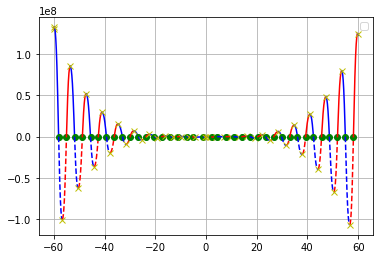

In [85]:
for i in range(len(x_change)-1):
    cur_x = np.arange(x_change[i][0], x_change[i+1][0]+step, step)
    if x_change[i][1] == 'zero':
        plt.plot(x_change[i][0], func(x_change[i][0]), 'go')
        plt.rcParams['lines.linestyle'] = switch_line()
        plt.plot(cur_x, func(cur_x), color)
    else:
        plt.plot(cur_x, func(cur_x), switch_color())
        plt.plot(x_change[i][0], func(x_change[i][0]), 'yx')


plt.legend()
plt.grid()
plt.show()
